<a href="https://colab.research.google.com/github/tarrun-10/Multilingual-convertion-using-NLP-/blob/main/nlp_jcom_final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the pakages for Image Extraction and Text detection 

In [ ]:
pip install pytesseract # For recognising and extracting the text from the image 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt install tesseract-ocr #OCR developed by google it can sence 100 languages

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
# Importing the basic pakages required for the code 
import pytesseract
import shutil #Provides high level interfacing 
import os  # provides functions for interacting with the operating system 
import random # Generates random numbers 
import cv2 # For computer vision functionalities for image and video processing.
import numpy as np #provides support for working with arrays and matrices of numerical data
import matplotlib.pyplot as plt # used for creating visualizations and plots
from PIL import Image

# Extracting the text from the image 

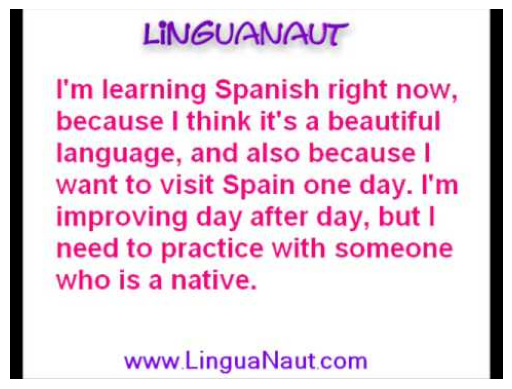

In [ ]:
# original image
ori_image = cv2.imread("/content/hqdefault.jpg") #Extracting the image 
ori_img = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB) # Appyling color
plt.imshow(ori_img) 
plt.axis('off')
plt.show()

(-0.5, 575.5, 431.5, -0.5)

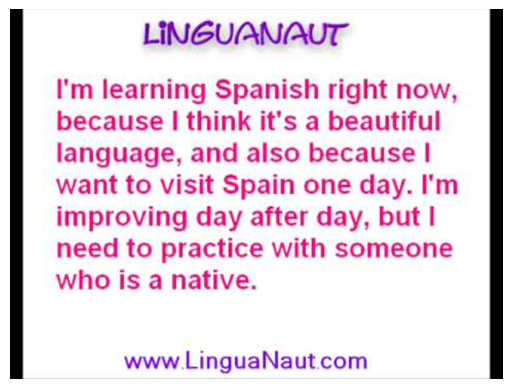

In [ ]:
fixed_img = cv2.resize(ori_img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
plt.imshow(fixed_img)
plt.axis("off")

In [ ]:
ogimg = cv2.cvtColor(fixed_img, cv2.COLOR_RGB2GRAY) #to convert an RGB image to gray scale 

(-0.5, 575.5, 431.5, -0.5)

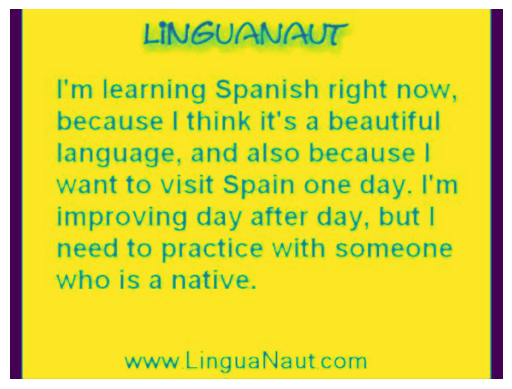

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) # library to create a structuring element for morphological operations.
dilation = cv2.dilate(ogimg, kernel, iterations=1) #applying dilation 
plt.imshow(dilation)
plt.axis("off")

(-0.5, 575.5, 431.5, -0.5)

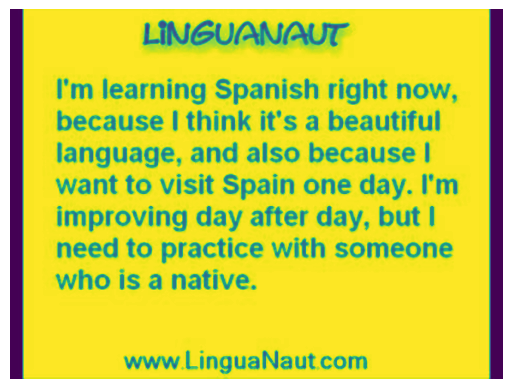

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
erosion= cv2.erode(dilation, kernel, iterations=1) # erostion 
plt.imshow(erosion)
plt.axis("off")

(-0.5, 575.5, 431.5, -0.5)

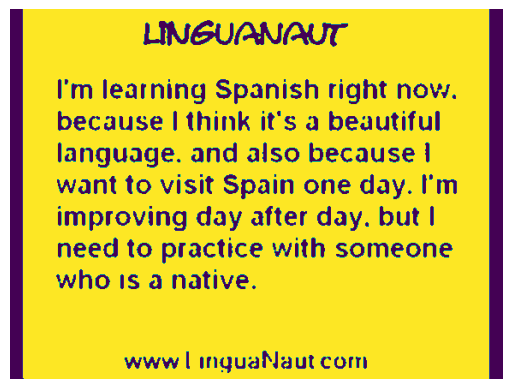

In [ ]:
binary = cv2.threshold(cv2.medianBlur(erosion, 3), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1] # thresholding for converting the image to bianry
plt.imshow(binary)
plt.axis("off")

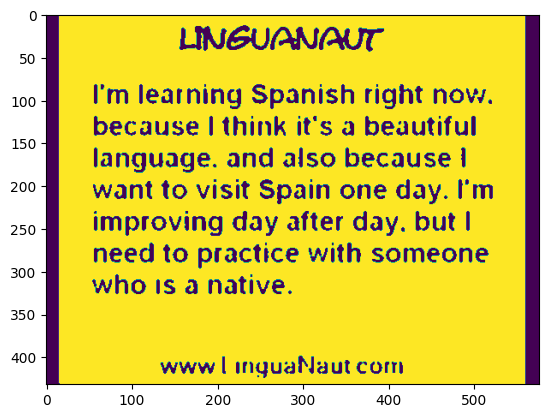

In [ ]:
gsbin = binary.astype(np.uint8) #storing the binary image in 8 bit
# gsbin= 255 * gsbin
plt.imshow(gsbin)

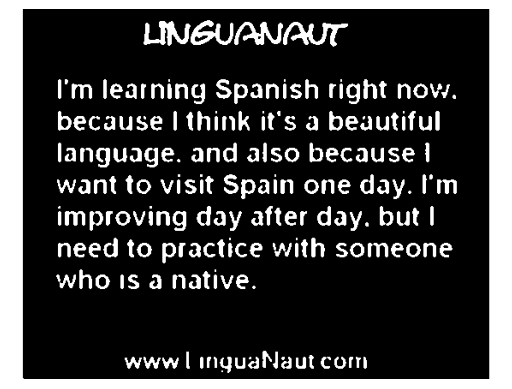

In [ ]:
image2 = cv2.cvtColor(255-gsbin, cv2.COLOR_GRAY2RGB) #to convert a grayscale image represented by the 255-gsbin variable to an RGB image.
plt.imshow(image2)
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.image
matplotlib.image.imsave('image1.png', image2)

In [ ]:
extractedText = pytesseract.image_to_string("image1.png",lang='eng+tam+hin+kan+tel+mal',config='--psm 6') #convert the extracted to string
extractedText= extractedText.replace('\n', ' ')

In [ ]:
print(extractedText)

LINGUANAUT I'm learning Spanish right now. because | think it's a beautiful language. and also because | want to visit Spain one day. I'm improving day after day. but | need to practice with someone who Is a native. Siw MUIR CTU meroli) 


# Language detection and making the text more understandable 

In [ ]:
!pip install langdetect #detect the language 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 45.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=b725c467f9e591f1954b78df46b2e3294b319f57be494ae207109614f76c232a
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [ ]:
from langdetect import detect
lang = detect(extractedText)
print(lang)  #detect the language 

en


In [ ]:
pip install translate #to translate text from one language to another

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install gTTs #Google Text-to-Speech

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing the requiered libraries 
import os
import gtts as gt

from translate import Translator
translator= Translator(from_lang=lang,to_lang="en")
translation = translator.translate(extractedText)
print(translation)

LINGUANAUT I'm learning Spanish right now. because | think it's a beautiful language. and also because | want to visit Spain one day. I'm improving day after day. but | need to practice with someone who Is a native. Siw MUIR CTU meroli) 


In [ ]:
trans = ""
i=0
preele= ""
for element in translation:
    i+=1
    n = ord(element)
    if 97 <= n <= 122 or 65<=n<=90 or 48<=n<=57:
        trans=trans+element
    else:
        if(preele==" "):
            trans=trans+""
        else:
            trans=trans+" "
    preele=element
      #print(element, end=' ')
    if(i==499):
        break;
print(trans)

LINGUANAUT I m learning Spanish right now  because  think it s a beautiful language  and also because  want to visit Spain one day  I m improving day after day  but  need to practice with someone who Is a native  Siw MUIR CTU meroli  


In [ ]:
trans1 = ""
i=0
preele= ""
for element in trans:
    i+=1
    n = ord(element)
    if 97 <= n <= 122 or 65<=n<=90 or 48<=n<=57:
        trans1=trans1+element
    else:
        if(preele==" "):
            trans1=trans1+""
        else:
            trans1=trans1+" "
    preele=element
      #print(element, end=' ')
    if(i==499):
        break;
print(trans1)

LINGUANAUT I m learning Spanish right now because think it s a beautiful language and also because want to visit Spain one day I m improving day after day but need to practice with someone who Is a native Siw MUIR CTU meroli 


In [ ]:
from textblob import TextBlob
tb_txt = TextBlob(trans1)

In [ ]:
correctedTBText = tb_txt.correct()
correctedText = str(correctedTBText)

In [ ]:
print(str(correctedText)) #finale text after modifications 

LINGUANAUT I m learning Spanish right now because think it s a beautiful language and also because want to visit Pain one day I m improving day after day but need to practice with someone who Is a native In MUIR CTU merely 


# Converting the english text to tamil 

In [ ]:
!pip install git+https://github.com/huggingface/transformers -q  #importing the Dataset from hugging face 
!pip install transformers -U -q  #Providies pretrained models and tokenzing tools 
!pip install sentencepiece #open-source text tokenizer and detokenizer developed by Google
!pip freeze | grep transformers #filters the output 

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.4 MB/s eta 0:00:00
transformers @ git+https://github.com/huggingface/transformers@50f82e12823ef8844b45a0dd864a78eea80de879


In [ ]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast # they are pretrained models used for convertion one language to another 



In [ ]:
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-one-to-many-mmt") #downloading the pretrained model 
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-one-to-many-mmt", src_lang="en_XX")


In [ ]:
model_inputs = tokenizer(correctedText, return_tensors="pt") #tokenizing the input 


In [ ]:
generated_tokens = model.generate(
    **model_inputs,
    forced_bos_token_id=tokenizer.lang_code_to_id["ta_IN"] #setting the language 
)



/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (200) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
translation = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)


In [ ]:
print(translation)

['லிங்கனவுட் நான் இப்பொழுது ஸ்பெயின் மொழியை கற்றுக் கொண்டிருக்கிறேன், ஏனெனில் இது ஒரு அழகிய மொழி என்று கருதுகிறேன், மேலும் ஒரு நாள் வலியை பார்க்க விரும்புகிறேன், நான் நாள்தோறும் மேம்பட்டு வருகிறேன், ஆனால் ஒருவருடன் பயிற்சி செய்ய வேண்டியது அவசியம்.']


# Text to speech 

In [ ]:
!pip install playsound #library to play sound 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=06d6a915d54566275d7cc2435ba65df7c0ea7d668f1ac1da8ae3a38d79f0eaa5
  Stored in directory: /root/.cache/pip/wheels/ba/39/54/c8f7ff9a88a644d3c58b4dec802d90b79a2e0fb2a6b884bf82
Successfully built playsound


In [ ]:
!pip install pydub #library for dubbing 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install ffmpeg #library for converting to speech 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=e3ae0ab09edf8abce72cd2609142f03284bfc792a79e39bee8e8fd12fcf6025f
  Stored in directory: /root/.cache/pip/wheels/1d/57/24/4eff6a03a9ea0e647568e8a5a0546cdf957e3cf005372c0245
Successfully built ffmpeg


In [ ]:
txt=' '.join(translation) #convert the list to string
tts=gt.gTTS(text=txt,lang="ta") 
tts.save("ttso.wav") #speech generated 
os.system("ttso.wav")

32512

In [ ]:
from IPython.display import Audio, display
sound_file = 'ttso.wav'
display(Audio(sound_file, autoplay=True)) #output 

In [ ]:
# from gtts import gTTS
# from IPython.display import Audio
# import io
#   # Tamil text
# tts = gt.gTTS(text=translation, lang="ta")
# tts.save("ttso.mp3")

# # Load the audio file as bytes
# with open("ttso.mp3", "rb") as f:
#     audio_bytes = f.read()

# # Play the audio
# Audio(audio_bytes)